# 19 - Diameter and Clustering Coefficient

*September 20 2022*

In this notebook, we study how the diameter of random graphs depends on the number of nodes and the link probability $p$ of the $G(n,p)$ model.

In [1]:
import pathpy as pp

import numpy as np
from scipy.stats import norm, poisson
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
sns.set_style("whitegrid")

## Diameter 

In the lecture, we have used some simple assumptions to find an approximate relationship between the diameter of a random network and the number of nodes (as well as the mean degree). In the following, we test how accurate this approximation is for sparse random networks:

The following function plots the scaling of the expected diameter as well as the scaling of the actual average diameter for a number of microstates generated by the $G(n,p)$ model with a fixed mean degree and variable numbers of nodes. We then use this function to plot the relationship for a mean degree of four.

Finished for n = 100
Finished for n = 200
Finished for n = 300
Finished for n = 400
Finished for n = 500
Finished for n = 600
Finished for n = 700
Finished for n = 800
Finished for n = 900


generating G(n,p) network:  50%|█████     | 554/1100 [00:00<00:00, 5525.13it/s]

Finished for n = 1000


generating G(n,p) network:  47%|████▋     | 559/1200 [00:00<00:00, 5585.76it/s]

Finished for n = 1100


generating G(n,p) network:  45%|████▍     | 579/1300 [00:00<00:00, 5771.59it/s]

Finished for n = 1200


generating G(n,p) network:  44%|████▍     | 615/1400 [00:00<00:00, 6137.54it/s]

Finished for n = 1300


generating G(n,p) network:  44%|████▎     | 656/1500 [00:00<00:00, 6549.12it/s]

Finished for n = 1400


generating G(n,p) network:  39%|███▉      | 622/1600 [00:00<00:00, 6211.37it/s]

Finished for n = 1500


generating G(n,p) network:   0%|          | 0/1700 [00:00<?, ?it/s]

Finished for n = 1600


generating G(n,p) network:  38%|███▊      | 684/1800 [00:00<00:00, 6839.71it/s]

Finished for n = 1700


generating G(n,p) network:   0%|          | 0/1900 [00:00<?, ?it/s]

Finished for n = 1800


generating G(n,p) network:   0%|          | 0/2000 [00:00<?, ?it/s]

Finished for n = 1900


component calculation: 100%|██████████| 2000/2000 [00:00<00:00, 2119.39it/s]


Finished for n = 2000
[7.308241808752199, 8.408241808752198, 9.05170055954547, 9.508241808752198, 9.862362713128297, 10.15170055954547, 10.396332223015563, 10.608241808752199, 10.795159310338741, 10.962362713128297, 11.113616589253224, 11.25170055954547, 11.3787254987074, 11.496332223015562, 11.605821463921568, 11.708241808752199, 11.804450934127571, 11.895159310338743, 11.980962073540143, 12.062362713128296]


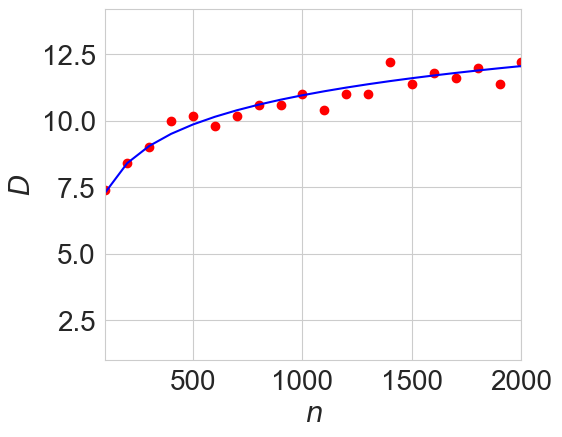

In [2]:
def mean_diameter(n, mean_degree, samples=1):
    diam = 0
    for i in range(samples):
        g = pp.generators.random_graphs.ER_np(n, mean_degree/n, loops=True)
        g = pp.algorithms.largest_connected_component(g)
        diam += pp.algorithms.diameter(g)
    print('Finished for n = {0}'.format(n))
    return diam/samples


def plot_diameter(n_range, mean_degree, samples=1):
    diams = []
    for n in n_range:
        diams.append(mean_diameter(int(n), mean_degree, samples))
        
    plt.clf()
    x = plt.scatter(n_range, diams, color='red')
    
    predicted = [2.2*np.log(n)/np.log(mean_degree) for n in n_range]
    print(predicted)
    x = plt.plot(n_range, predicted, color='blue')
    plt.axis([min(n_range), max(n_range), 1, max(diams)+2])
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)  
    plt.xlabel('$n$', fontsize=20)
    plt.ylabel('$D$', fontsize=20)
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.25)
    plt.show()

n_range = np.linspace(100, 2000, 20)
plot_diameter(n_range, 4, samples=5)

# Clustering coefficient in random networks

In the lecture we saw that we can easily calculate the expected average clustering coefficient of random graphs based on the mean degree of the network, which yields the corresponding link probability $p$ of the $G(n,p)$ model. The following function generates random graphs with a fixed number of nodes and a variable link probability $p$, showing that the average clustering coefficient in the microstates indeed corresponds to $p$.

Finished for p = 0.0
Finished for p = 0.016666666666666666
Finished for p = 0.03333333333333333
Finished for p = 0.05
Finished for p = 0.06666666666666667
Finished for p = 0.08333333333333333
Finished for p = 0.1
Finished for p = 0.11666666666666667
Finished for p = 0.13333333333333333
Finished for p = 0.15


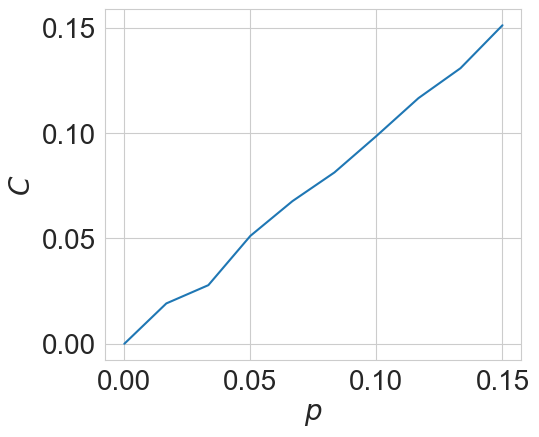

In [3]:
def average_cc(n, p, samples=1):
    cc = 0
    for i in range(samples):
        g = pp.generators.random_graphs.ER_np(n, p)
        cc += pp.statistics.avg_clustering_coefficient(g)
    print('Finished for p = {0}'.format(p))
    return cc/samples


def plot_clustering_coeff(n, p_range, samples=1):
    ccs = []
    
    for p in p_range:
        ccs.append(average_cc(n, p, samples))
        
    plt.clf()
    x = plt.plot(p_range, ccs)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)     
    plt.grid(True)
    plt.xlabel('$p$', fontsize=20)
    plt.ylabel('$C$', fontsize=20)     
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.25)    
    plt.show()

p_range = np.linspace(0, 0.15, 10)
plot_clustering_coeff(200, p_range, samples=3)

In the experiment above, we kept the size of the network constant, increasing the probability of links (and thus the mean degree of the networks). If we instead fix the mean degree of the network and increase the network size, this corresponds to a proportional decrease of the link probability, which explains why we expect large sparse networks to have a clustering coefficient of zero.

The following function generates random networks with variable number of nodes and fixed mean degree and confirms that the average clustering coefficient of realizations vanishes for increasingly large networks:

Finished for p = 0.04
Finished for p = 0.02
Finished for p = 0.013333333333333334
Finished for p = 0.01
Finished for p = 0.008
Finished for p = 0.006666666666666667
Finished for p = 0.005714285714285714
Finished for p = 0.005
Finished for p = 0.0044444444444444444
Finished for p = 0.004


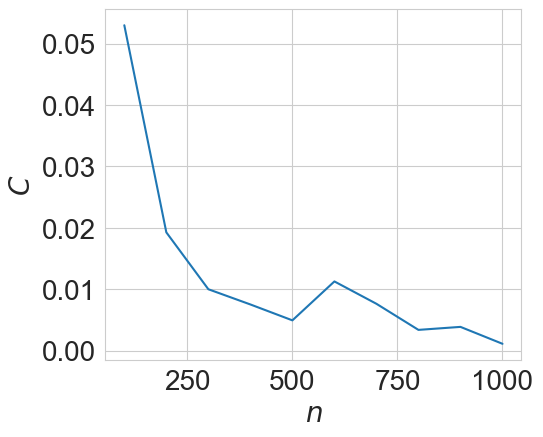

In [4]:
def plot_clustering_coeff(n_range, mean_degree, samples=1):
    ccs = []
    
    for n in n_range:
        ccs.append(average_cc(int(n), mean_degree/n, samples))
    
    plt.clf()
    x = plt.plot(n_range, ccs)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.grid(True)
    plt.xlabel('$n$', fontsize=20)
    plt.ylabel('$C$', fontsize=20)
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.25)
    plt.show()

n_range = np.linspace(100, 1000, 10)
plot_clustering_coeff(n_range, mean_degree=4, samples=1)

## Clustering coefficient of empirical networks

Let us now check how the average cluster coefficient in empirical networks compares to the expected value from a random graph model:

In [6]:
n_gentoo = pp.io.sql.read_network('data/networks.db', sql='SELECT DISTINCT source, target FROM gentoo', directed=False, loops=False)
n_highschool = pp.io.sql.read_network('data/networks.db', sql='SELECT DISTINCT source, target FROM highschool', directed=False, loops=False)
n_physicians = pp.io.sql.read_network('data/networks.db', sql='SELECT DISTINCT source, target FROM physicians', directed=False, loops=False)
n_lotr = pp.io.sql.read_network('data/networks.db', sql='SELECT DISTINCT source, target FROM LOTR', directed=False, loops=False)

[11-23 16:28:34: WARNING] 154 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.
[11-23 16:28:34: WARNING] 175 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.
[11-23 16:28:34: WARNING] 67 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.


In [7]:
c_x = n_gentoo.avg_clustering_coefficient()
c_e = pp.statistics.mean_degree(n_gentoo)/n_gentoo.number_of_nodes()
print('Actual clustering coefficient = ', c_x)
print('Expected clustering coefficient = ', c_e)

Actual clustering coefficient =  0.017357355654577633
Expected clustering coefficient =  0.006317383888823895


In [8]:
c_x = n_highschool.avg_clustering_coefficient()
c_e = pp.statistics.mean_degree(n_highschool)/n_highschool.number_of_nodes()
print('Actual clustering coefficient = ', c_x)
print('Expected clustering coefficient = ', c_e)

Actual clustering coefficient =  0.446799543049543
Expected clustering coefficient =  0.04833333333333333


In [9]:
c_x = n_physicians.avg_clustering_coefficient()
c_e = pp.statistics.mean_degree(n_physicians)/n_physicians.number_of_nodes()
print('Actual clustering coefficient = ', c_x)
print('Expected clustering coefficient = ', c_e)

Actual clustering coefficient =  0.3115751356464073
Expected clustering coefficient =  0.031783199325080495


In [10]:
c_x = n_lotr.avg_clustering_coefficient()
c_e = pp.statistics.mean_degree(n_lotr)/n_lotr.number_of_nodes()
print('Actual clustering coefficient = ', c_x)
print('Expected clustering coefficient = ', c_e)

Actual clustering coefficient =  0.5854291344779916
Expected clustering coefficient =  0.06562807308110347
